In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sn
from sklearn.linear_model import Perceptron
from sklearn import svm

# reading data from the files
train_dataset = np.genfromtxt(r"D:\PhD\CS5691\Assignments\Assignment3\Dataset\Dataset_1A\train.csv",delimiter=',')
feature_train = train_dataset[:,0:2] 
class_train = train_dataset[:,2]
class_count = len(set(class_train))
d=2

training = [[]for rows in range(class_count)]
training_label = [[]for rows in range(class_count)]
for i in range(len(feature_train)):
    training[int(class_train[i])].append(feature_train[i])
    training_label[int(class_train[i])].append(class_train[i])

dev_dataset = np.genfromtxt(r"D:\PhD\CS5691\Assignments\Assignment3\Dataset\Dataset_1A\dev.csv",delimiter=',')
feature_dev = dev_dataset[0:int(0.5*len(dev_dataset)),0:2] 
class_dev = dev_dataset[0:int(0.5*len(dev_dataset)),2]

validation = [[]for rows in range(class_count)]
validation_label = [[]for rows in range(class_count)]
for i in range(len(feature_dev)):
    validation[int(class_dev[i])].append(feature_dev[i])
    validation_label[int(class_dev[i])].append(class_dev[i])

feature_test = dev_dataset[int(0.5*len(dev_dataset)):,0:2]
class_test = dev_dataset[int(0.5*len(dev_dataset)):,2]

test = [[]for rows in range(class_count)]
test_label = [[]for rows in range(class_count)]
for i in range(len(feature_test)):
    test[int(class_test[i])].append(feature_test[i])
    test_label[int(class_test[i])].append(class_test[i])

# generating meshgrid    
X1_lim = np.arange(start = feature_train[:,0].min()-1, stop = feature_train[:,0].max()+1,step = 0.15)
X2_lim = np.arange(start = feature_train[:,1].min()-1, stop = feature_train[:,1].max()+1,step = 0.15)
XX,YY = np.meshgrid(X1_lim,X2_lim)

#Converting XX,YY to 1D array, then changing its number of columns to 2
reshape_array = np.array([XX.ravel(),YY.ravel()]).T
assign_class_plot_boundary = np.zeros(len(reshape_array))

pos = np.empty(XX.shape + (2,))
pos[:, :, 0] = XX
pos[:, :, 1] = YY

# for printing Heatmap
def printheatmap(c):
    sn.heatmap(c,annot=True,fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show() 

In [2]:
def predict_Perceptron(data,label,i,j):
    predict = model.predict(data)
    for k in range(len(data)):
        if(label[k]==i):
            label[k]=0
        else:
            label[k]=1
        if(predict[k]==i):
            predict[k]=0
        else:
            predict[k]=1
    confusion_matrix = np.zeros((2,2),dtype=int)
    for i in range(len(data)):
        confusion_matrix[int(predict[i])][int(label[i])]+=1
    return confusion_matrix

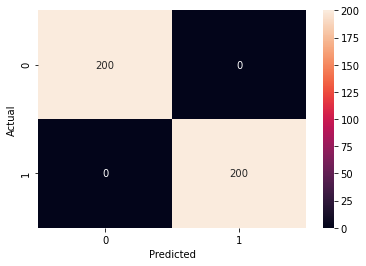

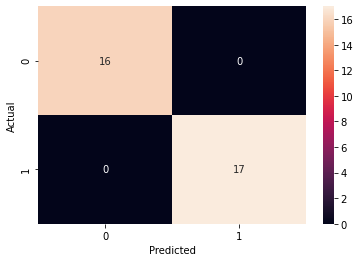

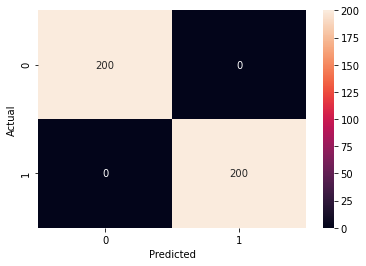

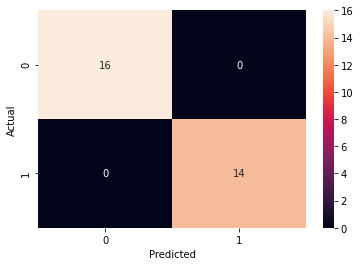

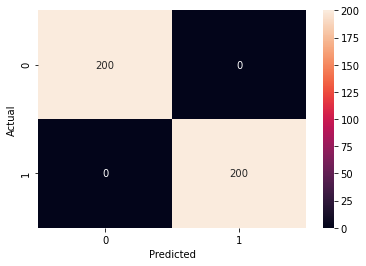

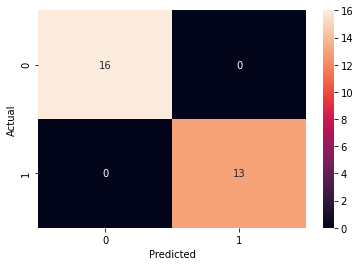

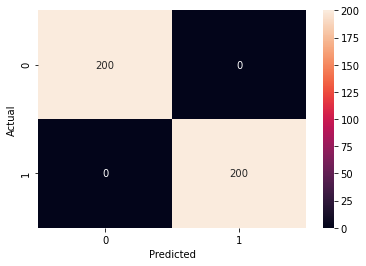

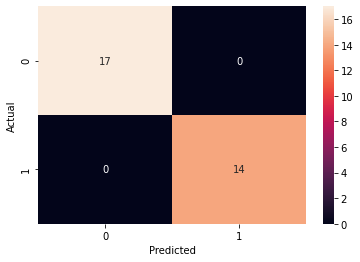

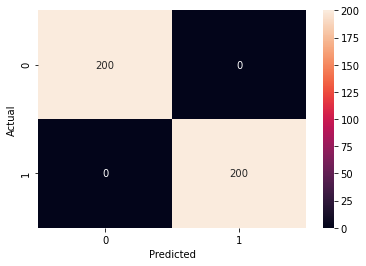

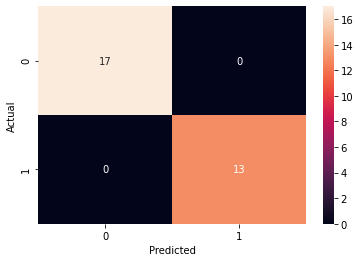

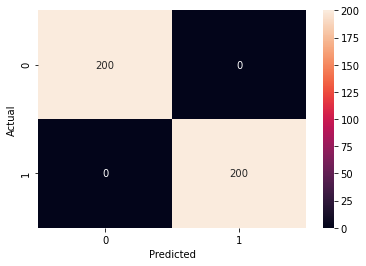

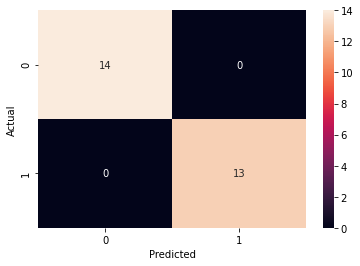

(array([[  0., 100., 100., 100.],
        [  0.,   0., 100., 100.],
        [  0.,   0.,   0., 100.],
        [  0.,   0.,   0.,   0.]]),
 array([[  0., 100., 100., 100.],
        [  0.,   0., 100., 100.],
        [  0.,   0.,   0., 100.],
        [  0.,   0.,   0.,   0.]]),
 array([[  0., 100., 100., 100.],
        [  0.,   0., 100., 100.],
        [  0.,   0.,   0., 100.],
        [  0.,   0.,   0.,   0.]]))

In [3]:
accuracy_train = np.zeros((class_count,class_count))
accuracy_dev = np.zeros((class_count,class_count))
accuracy_test = np.zeros((class_count,class_count))
for i in range(class_count):
    for j in range(class_count):
        if(i>=j):
            continue 
        train_data = np.concatenate([training[i],training[j]])
        train_label = np.concatenate([training_label[i],training_label[j]])

        #model training
        model = Perceptron(eta0=0.1)
        model.fit(train_data,train_label)
        
        data = np.concatenate([training[i],training[j]])
        label = np.concatenate([training_label[i],training_label[j]])
        confusion_matrix = predict_Perceptron(data,label,i,j)
        printheatmap(confusion_matrix)
        accuracy_train[i][j] = np.trace(confusion_matrix)/len(data)*100
        
        data = np.concatenate([validation[i],validation[j]])
        label = np.concatenate([validation_label[i],validation_label[j]])
        confusion_matrix = predict_Perceptron(data,label,i,j)
        accuracy_dev[i][j] = np.trace(confusion_matrix)/len(data)*100
        
        data = np.concatenate([test[i],test[j]])
        label = np.concatenate([test_label[i],test_label[j]])
        confusion_matrix = predict_Perceptron(data,label,i,j)
        printheatmap(confusion_matrix)
        accuracy_test[i][j] = np.trace(confusion_matrix)/len(data)*100
accuracy_train,accuracy_dev,accuracy_test

In [4]:
def predict_SVM(data,label,i,j):
    predict = clf.predict(data)
    for k in range(len(data)):
        if(label[k]==i):
            label[k]=0
        else:
            label[k]=1
        if(predict[k]==i):
            predict[k]=0
        else:
            predict[k]=1
    confusion_matrix = np.zeros((2,2),dtype=int)
    for i in range(len(data)):
        confusion_matrix[int(predict[i])][int(label[i])]+=1
    return confusion_matrix

<ipython-input-19-678518bb8f06>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


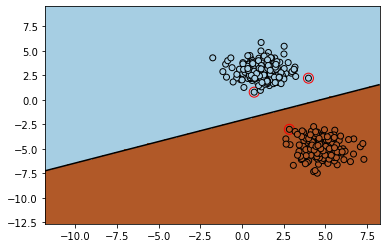

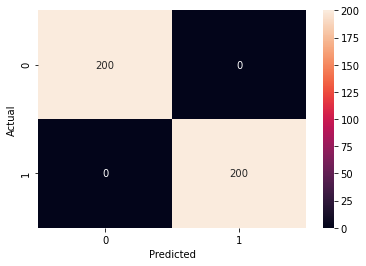

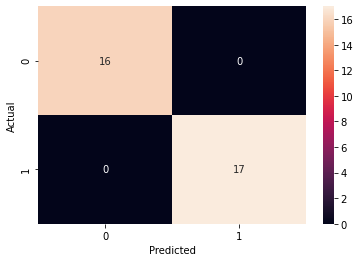

<ipython-input-19-678518bb8f06>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


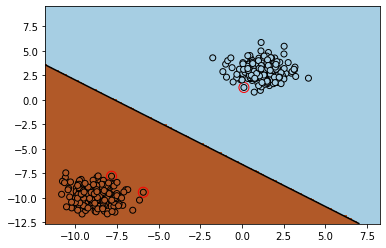

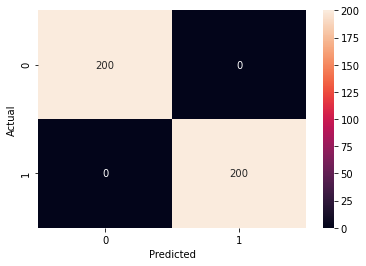

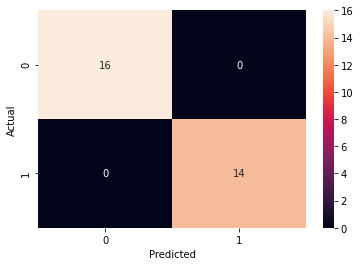

<ipython-input-19-678518bb8f06>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


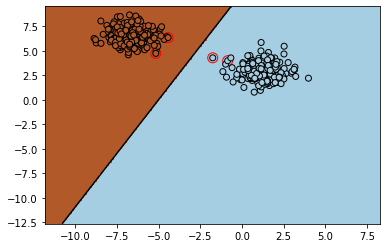

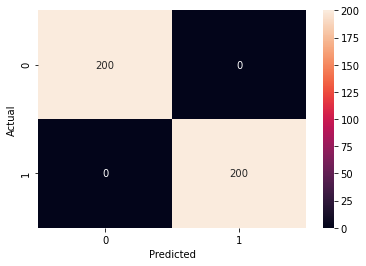

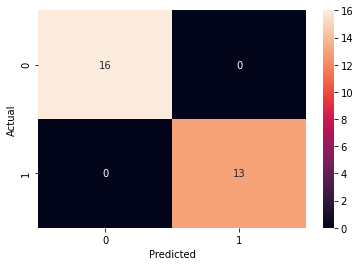

<ipython-input-19-678518bb8f06>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


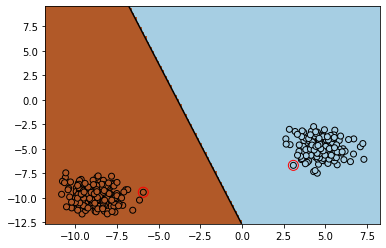

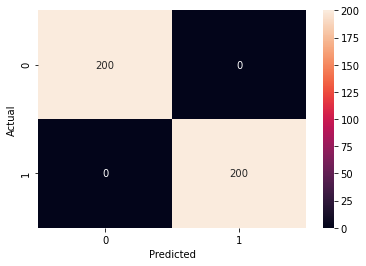

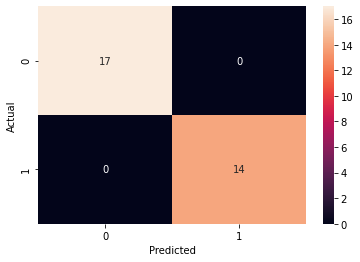

<ipython-input-19-678518bb8f06>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


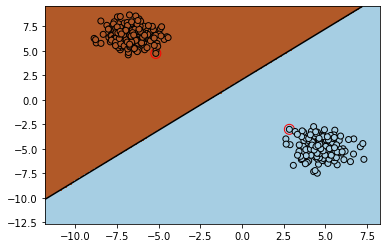

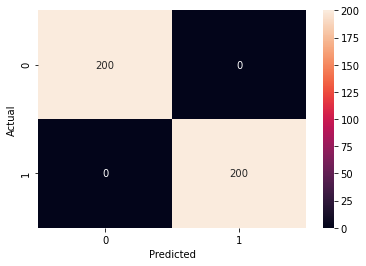

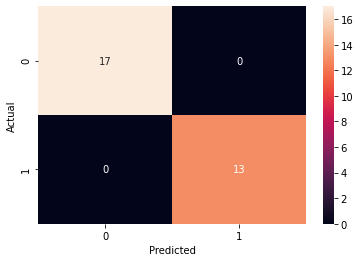

<ipython-input-19-678518bb8f06>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


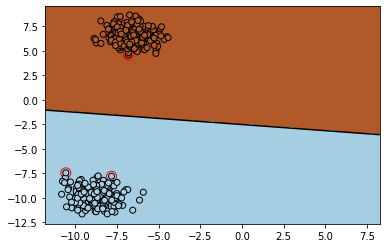

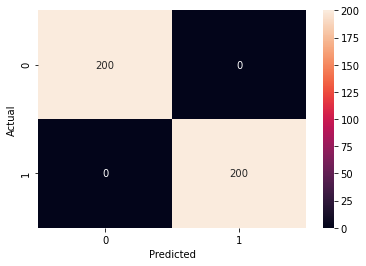

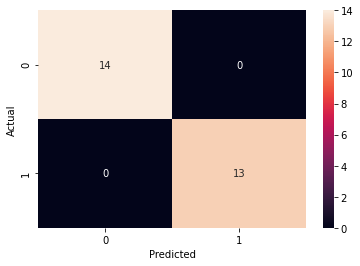

(array([[  0., 100., 100., 100.],
        [  0.,   0., 100., 100.],
        [  0.,   0.,   0., 100.],
        [  0.,   0.,   0.,   0.]]),
 array([[  0., 100., 100., 100.],
        [  0.,   0., 100., 100.],
        [  0.,   0.,   0., 100.],
        [  0.,   0.,   0.,   0.]]),
 array([[  0., 100., 100., 100.],
        [  0.,   0., 100., 100.],
        [  0.,   0.,   0., 100.],
        [  0.,   0.,   0.,   0.]]))

In [19]:
for i in range(class_count):
    for j in range(class_count):
        if(i>=j):
            continue 
        train_data = np.concatenate([training[i],training[j]])
        train_label = np.concatenate([training_label[i],training_label[j]])

        #model training
        clf = svm.SVC(kernel='linear',C=0.1)
        clf.fit(train_data,train_label)
        
        w = clf.coef_[0]
        a = -w[0] / w[1]
        yy = a * XX - (clf.intercept_[0]) / w[1]

        plt.figure()
        plt.clf()
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', zorder=5, edgecolors='r')
        plt.scatter(train_data[:, 0], train_data[:, 1], c=train_label, zorder=5, cmap=plt.cm.Paired, edgecolors='k')
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k'], linestyles=['-'],levels=[0])
        plt.show()
        
        data = np.concatenate([training[i],training[j]])
        label = np.concatenate([training_label[i],training_label[j]])
        confusion_matrix = predict_SVM(data,label,i,j)
        printheatmap(confusion_matrix)
        accuracy_train[i][j] = np.trace(confusion_matrix)/len(data)*100
        
        data = np.concatenate([validation[i],validation[j]])
        label = np.concatenate([validation_label[i],validation_label[j]])
        confusion_matrix = predict_SVM(data,label,i,j)
        accuracy_dev[i][j] = np.trace(confusion_matrix)/len(data)*100
        
        data = np.concatenate([test[i],test[j]])
        label = np.concatenate([test_label[i],test_label[j]])
        confusion_matrix = predict_SVM(data,label,i,j)
        printheatmap(confusion_matrix)
        accuracy_test[i][j] = np.trace(confusion_matrix)/len(data)*100
accuracy_train,accuracy_dev,accuracy_test